In [158]:
import pandas as pd
import numpy as np
#upload the dataset
from google.colab import files
uploaded=files.upload()

Saving Salary.csv to Salary (5).csv


In [159]:
#load the dataset
dataset=pd.read_csv("Salary.csv")
print(dataset)

    age  education  capital  hrs per week income
0    90          9        0            40  <=50K
1    82          9        0            18  <=50K
2    66         10        0            40  <=50K
3    54          4        0            40  <=50K
4    41         10        0            40  <=50K
5    34          9        0            45  <=50K
6    38          6        0            40  <=50K
7    74         16        0            20   >50K
8    68          9        0            40  <=50K
9    41         10        0            60   >50K
10   45         16        0            35   >50K
11   38         15        0            45  <=50K
12   52         13        0            20   >50K
13   32         14        0            55   >50K
14   51         16        0            40   >50K
15   46         15        0            40   >50K


In [160]:
#mapping the dataset
income_set=set(dataset['income'])
dataset['income']=dataset['income'].map({'<=50K':0,'>50K':1}).astype(int)
print(dataset.head(5))

   age  education  capital  hrs per week  income
0   90          9        0            40       0
1   82          9        0            18       0
2   66         10        0            40       0
3   54          4        0            40       0
4   41         10        0            40       0


In [161]:
#segregate datta into X&Y
X=dataset.iloc[:,:-1]
X

,age,education,capital,hrs per week
0,90,9,0,40
1,82,9,0,18
2,66,10,0,40
3,54,4,0,40
4,41,10,0,40
5,34,9,0,45
6,38,6,0,40
7,74,16,0,20
8,68,9,0,40
9,41,10,0,60


In [162]:
Y=dataset.iloc[:,-1]
Y

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     1
8     0
9     1
10    1
11    0
12    1
13    1
14    1
15    1
Name: income, dtype: int64

In [163]:
#splitting dataset into train and test
#! pip install scikit_learn
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [164]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
X_train

array([[-1.36578877,  0.65842692,  0.        ,  1.39152822],
       [-0.89973763,  0.92179769,  0.        ,  0.48891532],
       [ 1.4305181 , -0.65842692,  0.        ,  0.03760887],
       [-0.66671206, -0.39505615,  0.        ,  1.84283467],
       [ 1.27516772, -0.39505615,  0.        ,  0.03760887],
       [-0.2783361 ,  0.92179769,  0.        ,  0.03760887],
       [-0.66671206, -0.39505615,  0.        ,  0.03760887],
       [ 1.89656925,  1.18516846,  0.        , -1.76761692],
       [-0.35601129,  1.18516846,  0.        , -0.41369758],
       [ 0.18771504,  0.39505615,  0.        , -1.76761692],
       [ 0.34306543, -1.97528077,  0.        ,  0.03760887],
       [-0.89973763, -1.44853923,  0.        ,  0.03760887]])

Text(0, 0.5, 'mean error')

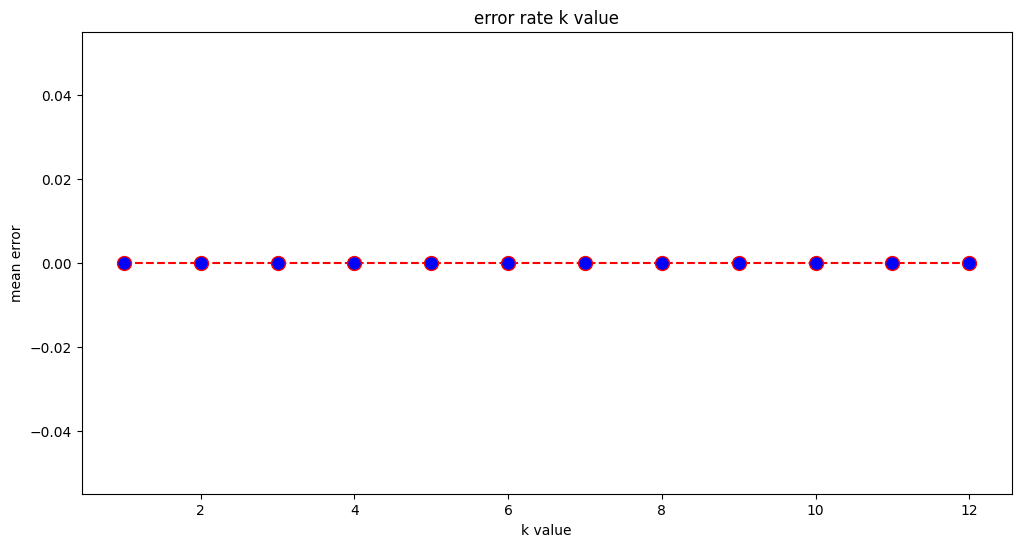

In [184]:
#find the best k value
error=[]
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
#calculating error for k blw 1 to 40
for i in range(1, X_train.shape[0]+1):
  model=KNeighborsClassifier(n_neighbors=7)
  model.fit(X_train,Y_train)
  pred_i = model.predict(X_test)
  error.append(np.mean(pred_i!=Y_test))
plt.figure(figsize=(12,6))
# if X_test.shape[0] != X_train.shape[0]:
#   raise ValueError("X_test and X_train must have the same number of rows.")
plt.plot(range(1, X_train.shape[0]+1),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('error rate k value')
plt.xlabel('k value')
plt.ylabel('mean error')


In [185]:
#training
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=7,metric='minkowski',p=2)
model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=7)

In [186]:
#predicting,whether new customer with age & salary will buy or not
age=int(input("enter new employee's age:"))
edu=int(input("enter new employee's education:"))
cg=int(input("enter new employee's cg:"))
wh=int(input("enter new employee hrs per week:"))
newEmp=[[age,edu,cg,wh]]
result=model.predict(sc.transform(newEmp))
print(result)
if result==1:
  print("employee might got salary above 50k")
else:
  print("customer might not got salary above 50k")

enter new employee's age:23
enter new employee's education:10
enter new employee's cg:0
enter new employee hrs per week:56
[1]
employee might got salary above 50k


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [187]:
#prediction for all test data
y_pred=model.predict(X_test)

In [188]:
#evaluating model-CONFUSION MATRIX
from sklearn.metrics import confusion_matrix,accuracy_score
print("accuracy of the model:{0}%".format(accuracy_score(Y_test,y_pred)*100))

accuracy of the model:100.0%
